## Observations

missing door index gefixt. 
* AR1 model werkt, maar niet goed. getest met ACF, PACF. lage AR (1/2) is nuttig met seasonal effect erin

In [153]:
from data_loading import load_data
from data_exploration import initial_checks
import pandas as pd

train_df, test_df, sample_submission = load_data()

initial_checks([train_df, test_df, sample_submission], ['train_df', 'test_df', 'sample_submission'])

Informatie over data set train_df is:

Shape: (8763, 49)
Columns: Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', '

In [2]:
train_df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


## Preprocess data

In [9]:
train_df['time'].describe()

count                    8763
unique                   8763
top       2017-12-31 21:00:00
freq                        1
Name: time, dtype: object

In [10]:
from preprocessing import check_nan_in_column

df = train_df.copy()


nan_count, nan_percentage = check_nan_in_column(df, 'load_shortfall_3h')
print(nan_count)


NaN Analysis for column 'load_shortfall_3h':
Number of NaN values: 0
Percentage of NaN values: 0.00%
0


In [11]:
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
df = df.sort_index()

In [12]:
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='3h')

In [13]:
print(full_index)

DatetimeIndex(['2015-01-01 03:00:00', '2015-01-01 06:00:00',
               '2015-01-01 09:00:00', '2015-01-01 12:00:00',
               '2015-01-01 15:00:00', '2015-01-01 18:00:00',
               '2015-01-01 21:00:00', '2015-01-02 00:00:00',
               '2015-01-02 03:00:00', '2015-01-02 06:00:00',
               ...
               '2017-12-30 18:00:00', '2017-12-30 21:00:00',
               '2017-12-31 00:00:00', '2017-12-31 03:00:00',
               '2017-12-31 06:00:00', '2017-12-31 09:00:00',
               '2017-12-31 12:00:00', '2017-12-31 15:00:00',
               '2017-12-31 18:00:00', '2017-12-31 21:00:00'],
              dtype='datetime64[ns]', length=8767, freq='3h')


In [14]:

df = df.reindex(full_index)
nan_count, nan_percentage = check_nan_in_column(df, 'load_shortfall_3h')
print(nan_count)



NaN Analysis for column 'load_shortfall_3h':
Number of NaN values: 4
Percentage of NaN values: 0.05%
4


In [15]:
print(len(test_df))
print(len(train_df))

2920
8763


In [16]:
df = df.interpolate()
nan_count, nan_percentage = check_nan_in_column(df, 'load_shortfall_3h')
print(nan_count)


NaN Analysis for column 'load_shortfall_3h':
Number of NaN values: 0
Percentage of NaN values: 0.00%
0


In [17]:
df['time_diff'] = df.index.diff()
print(df['time_diff'].value_counts())

time_diff
0 days 03:00:00    8766
Name: count, dtype: int64


In [18]:
irregular_rows = df[df['time_diff'] != pd.Timedelta(hours=3)]
print(irregular_rows)

                     Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
2015-01-01 03:00:00           0.666667             0.0             0.666667   

                     Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
2015-01-01 03:00:00         74.333333             64.0                0.0   

                     Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
2015-01-01 03:00:00                1.0                 0.0       223.333333   

                     Barcelona_wind_speed  ...  Barcelona_temp_min  \
2015-01-01 03:00:00              6.333333  ...             281.013   

                     Bilbao_temp_max  Seville_temp_min  Madrid_temp  \
2015-01-01 03:00:00       269.338615        274.254667      265.938   

                     Madrid_temp_min  load_shortfall_3h                Time  \
2015-01-01 03:00:00          265.938        6715.666667 2015-01-01 03:00:00   

                     Valencia_wind_deg_cat  Seville_pressure_cat  time_diff  
2015-0

In [19]:
print(pd.infer_freq(df.index))

3h


In [20]:
print(df.index.to_series().diff().value_counts()) 

0 days 03:00:00    8766
Name: count, dtype: int64


In [21]:
df= df.asfreq('3h')

In [22]:
y_train = df["load_shortfall_3h"].iloc[:-int(len(df)*0.1)]
y_val = df["load_shortfall_3h"].iloc[-int(len(df)*0.1):]

In [23]:
print(y_train.info())
print(y_val.info())

<class 'pandas.core.series.Series'>
DatetimeIndex: 7891 entries, 2015-01-01 03:00:00 to 2017-09-13 09:00:00
Freq: 3h
Series name: load_shortfall_3h
Non-Null Count  Dtype  
--------------  -----  
7891 non-null   float64
dtypes: float64(1)
memory usage: 123.3 KB
None
<class 'pandas.core.series.Series'>
DatetimeIndex: 876 entries, 2017-09-13 12:00:00 to 2017-12-31 21:00:00
Freq: 3h
Series name: load_shortfall_3h
Non-Null Count  Dtype  
--------------  -----  
876 non-null    float64
dtypes: float64(1)
memory usage: 13.7 KB
None


In [24]:
from statsmodels.tsa.ar_model import AutoReg

def train_autoreg_model(y_train):
    """
    Train an AutoReg model on the provided training data.
    
    Parameters:
    y_train (pd.Series): The training data for the target variable.
    
    Returns:
    model_fit: The fitted AutoReg model.
    """
    # Fit the AutoReg model
    model = AutoReg(y_train, lags=1)
    model_fit = model.fit()
    
    return model_fit

model_fit = train_autoreg_model(y_train)

print(model_fit.summary())


                            AutoReg Model Results                             
Dep. Variable:      load_shortfall_3h   No. Observations:                 7891
Model:                     AutoReg(1)   Log Likelihood              -74039.490
Method:               Conditional MLE   S.D. of innovations           2878.508
Date:                Wed, 21 May 2025   AIC                         148084.981
Time:                        10:32:19   BIC                         148105.901
Sample:                    01-01-2015   HQIC                        148092.146
                         - 09-13-2017                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1781.5932     73.332     24.295      0.000    1637.865    1925.322
load_shortfall_3h.L1     0.8301      0.006    132.199      0.000       0.818       0.842
            

In [25]:
predictions = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_val) - 1, dynamic=False)

In [26]:
from data_pipeline import evaluate_model

evaluate_model(y_val, predictions)

np.float64(5722.363109000763)

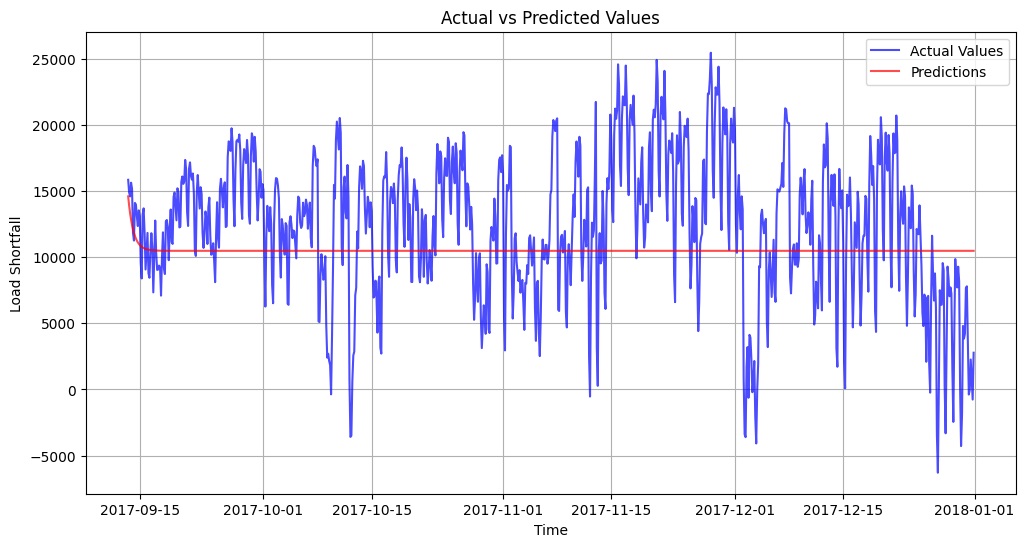

In [27]:
import matplotlib.pyplot as plt

def plot_predictions(y_val, predictions):
    """
    Plots the actual values (y_val) and the predicted values (predictions).

    Parameters:
    -----------
    y_val : pandas.Series or numpy.array
        The actual values of the target variable.
    predictions : pandas.Series or numpy.array
        The predicted values of the target variable.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(y_val, label='Actual Values', color='blue', alpha=0.7)
    plt.plot(predictions, label='Predictions', color='red', alpha=0.7)
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Time')
    plt.ylabel('Load Shortfall')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_predictions(y_val, predictions)

In [ ]:
from preprocessing import preprocess_data

train_df, test_df, sample_submission = load_data()
df = train_df.copy()

df = preprocess_data(df)

In [29]:
print(df.head())
print(df.info())

                     Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
2015-01-01 03:00:00           0.666667             0.0             0.666667   
2015-01-01 06:00:00           0.333333             0.0             1.666667   
2015-01-01 09:00:00           1.000000             0.0             1.000000   
2015-01-01 12:00:00           1.000000             0.0             1.000000   
2015-01-01 15:00:00           1.000000             0.0             1.000000   

                     Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
2015-01-01 03:00:00         74.333333        64.000000                0.0   
2015-01-01 06:00:00         78.333333        64.666667                0.0   
2015-01-01 09:00:00         71.333333        64.333333                0.0   
2015-01-01 12:00:00         65.333333        56.333333                0.0   
2015-01-01 15:00:00         59.000000        57.000000                2.0   

                     Bilbao_wind_speed  Seville_clouds_all  Bi

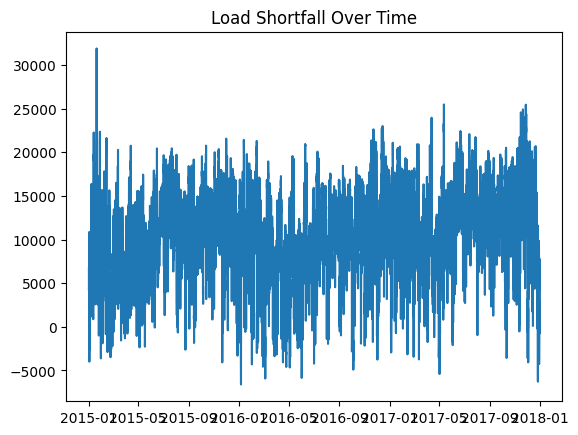

In [30]:
plt.plot(df['load_shortfall_3h'])
plt.title('Load Shortfall Over Time')
plt.show()

In [138]:
from statsmodels.tsa.stattools import adfuller

X = df['load_shortfall_3h']
result = adfuller(X)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# result is non-stationary

ADF Statistic: -10.074302194703593
p-value: 1.2353820442290728e-17
Critical Values: {'1%': np.float64(-3.4310993669444065), '5%': np.float64(-2.86187117030305), '10%': np.float64(-2.566946276984866)}


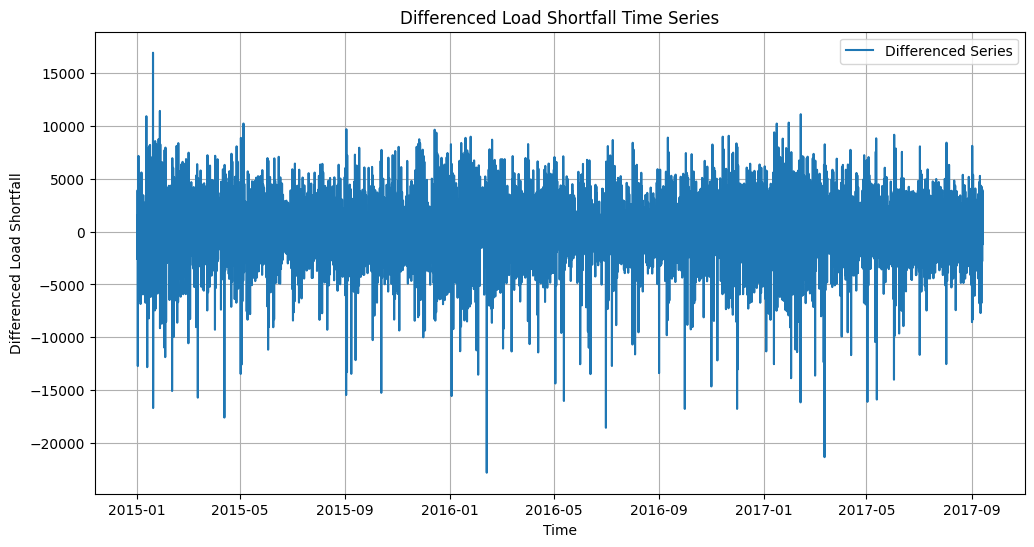

ADF Statistic: -21.46824869994648
p-value: 0.0
Critical Values: {'1%': np.float64(-3.4311829859690692), '5%': np.float64(-2.86190811916545), '10%': np.float64(-2.5669659452053604)}
The series is stationary.


In [139]:
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt

# Differencing to make the series stationary
diff_series = y_train.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(diff_series, label='Differenced Series')
plt.title('Differenced Load Shortfall Time Series')
plt.xlabel('Time')
plt.ylabel('Differenced Load Shortfall')
plt.legend()
plt.grid(True)
plt.show()

# Perform the ADF test on the differenced series
adf_result = adfuller(diff_series)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

# Check if the series is stationary
if adf_result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

In [137]:
from models import train_ar_diff_model, predict_ar_diff

model_fit, last_value, lags = train_ar_diff_model(y_train)

print(model_fit.summary(),last_value, lags)

print(last_value)

                            AutoReg Model Results                             
Dep. Variable:      load_shortfall_3h   No. Observations:                 7890
Model:                     AutoReg(2)   Log Likelihood              -73092.108
Method:               Conditional MLE   S.D. of innovations           2558.822
Date:                Wed, 21 May 2025   AIC                         146192.215
Time:                        12:34:20   BIC                         146220.108
Sample:                    01-01-2015   HQIC                        146201.769
                         - 09-13-2017                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.6509     28.811      0.057      0.954     -54.817      58.119
load_shortfall_3h.L1     0.1734      0.010     17.995      0.000       0.155       0.192
load_shortfa

In [135]:
predictions = predict_ar_diff(model_fit, last_value, lags, steps=len(y_val), index=y_val.index)
print(last_value)
print(predictions)
model_fit.__class__.__name__
target_variable = "load_shortfall_3h"
model_fit, last_value, lags = train_ar_diff_model(train_df[target_variable])
test_predictions = predict_ar_diff(model_fit, last_value, lags, steps=len(test_df), index=test_df.index)
print(last_value)
print(y_train.iloc[-1])
print(test_predictions)

2780.6666666667
2017-09-13 12:00:00    4248.739974
2017-09-13 15:00:00    2658.520101
2017-09-13 18:00:00    1601.659568
2017-09-13 21:00:00    2243.451495
2017-09-14 00:00:00    2912.684735
                          ...     
2017-12-31 09:00:00    2219.198513
2017-12-31 12:00:00    2218.884850
2017-12-31 15:00:00    2218.571188
2017-12-31 18:00:00    2218.257526
2017-12-31 21:00:00    2217.943864
Freq: 3h, Length: 876, dtype: float64
2780.6666666667
15445.0
0       4248.739974
1       2658.520101
2       1601.659568
3       2243.451495
4       2912.684735
           ...     
2915    1578.072875
2916    1577.759213
2917    1577.445551
2918    1577.131888
2919    1576.818226
Length: 2920, dtype: float64


c:\USERS\LACKERMAN008\ONEDRIVE - PWC\OUTSIDE\CODE\MACHINE LEARNING\ELECTRICITY SHORTFALL CHALLENGE\.VENV\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [126]:
y_train.iloc[-1]

np.float64(15445.0)

RMSE: 11425.972


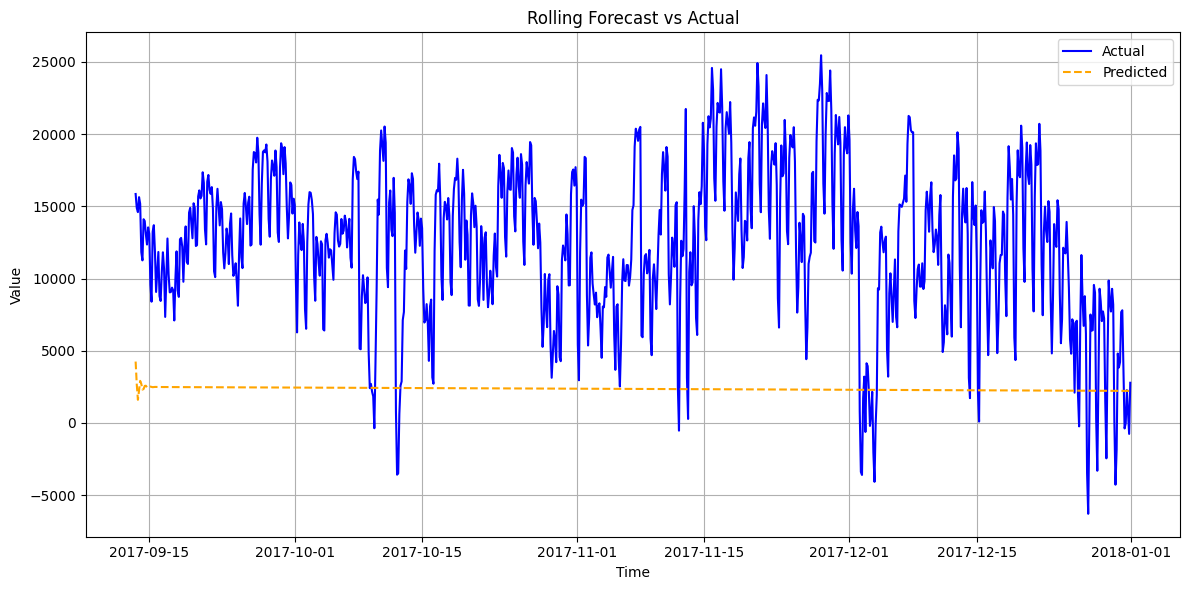

In [124]:
pred_series = predictions
evaluate_series = y_val
from data_pipeline import evaluate_model
rmse = evaluate_model(evaluate_series, pred_series)

print(f"RMSE: {rmse:.3f}")


plt.figure(figsize=(12, 6))
plt.plot(evaluate_series, label='Actual', color='blue')
plt.plot(pred_series, label='Predicted', color='orange', linestyle='--')

plt.title('Rolling Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

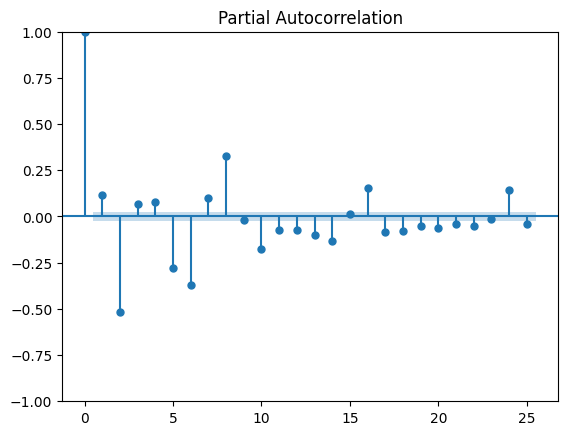

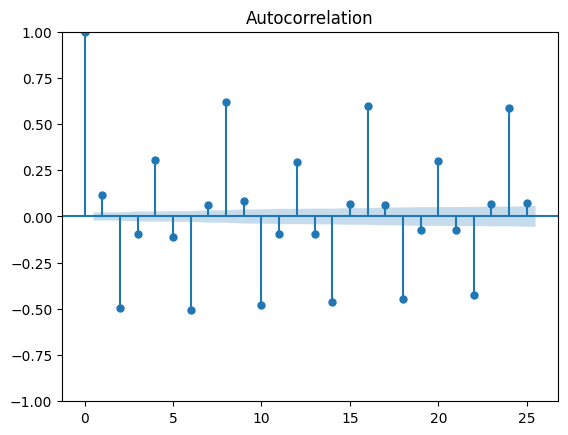

In [140]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(diff_series,lags=25)
acf=plot_acf(diff_series,lags=25)